In [41]:
import os
for dirname, _, filenames in os.walk('/kaggle/inpurt'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv('C:/Users/Owner/Desktop/git/Advertising/가장 많이 구독한 유튜브 채널 1000개/topSubscribed.csv')

In [44]:
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


In [45]:
df.shape

(1000, 7)

In [46]:
df.describe()

,Rank,Started
count,1000.000000,1000.000000
mean,500.500000,2012.594000
std,288.819436,4.110238
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


In [47]:
df.tail()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
995,996,XO TEAM,"11,500,000","11,471,384,709","2,679",People & Blogs,2021
996,997,Nirahua Music World,"11,500,000","5,997,717,755",788,Music,2014
997,998,YtCrash,"11,400,000","3,825,084",1,Education,2015
998,999,Painzeiro,"11,400,000","2,143,444,281",946,People & Blogs,2015
999,1000,Oum Walid,"11,400,000","2,480,064,722","1,598",People & Blogs,2015


In [48]:
df.isnull().sum() 

Rank               0
Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [50]:
col = ['Subscribers','Video Views','Video Count']
for i in col:
    df[i] = df[i].str.replace("," , "")

In [51]:
col = ['Subscribers','Video Views','Video Count']
for i in col:
    df[i] = df[i].astype('int64')

In [52]:
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012


In [53]:
df.describe()

,Rank,Subscribers,Video Views,Video Count,Started
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.158140e+07,9.994912e+09,9416.228000,2012.594000
std,288.819436,1.662556e+07,1.300546e+10,32190.909114,4.110238
min,1.000000,1.140000e+07,0.000000e+00,0.000000,1970.000000
25%,250.750000,1.340000e+07,3.871470e+09,365.500000,2010.000000
50%,500.500000,1.660000e+07,6.723360e+09,896.000000,2013.000000
75%,750.250000,2.320000e+07,1.223052e+10,3277.250000,2015.000000
max,1000.000000,2.340000e+08,2.129003e+11,342802.000000,2021.000000


In [54]:
df2 = df[['Youtube Channel', 'Started']]

df2

,Youtube Channel,Started
0,T-Series,2006
1,YouTube Movies,2015
2,Cocomelon - Nursery Rhymes,2006
3,SET India,2006
4,MrBeast,2012
...,...,...
995,XO TEAM,2021
996,Nirahua Music World,2014
997,YtCrash,2015
998,Painzeiro,2015


In [55]:
#매년 시작하는 채널 수

In [56]:
df2 = df.groupby('Started').count()

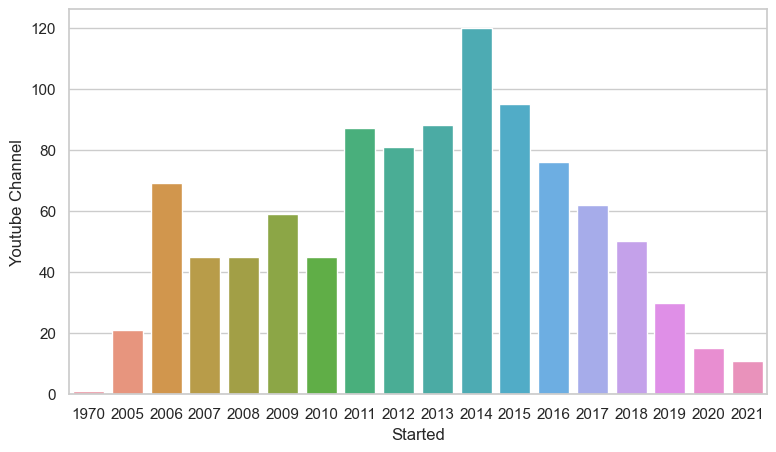

In [57]:
plt.figure(figsize = (9,5))
sns.set_theme(style = 'whitegrid')
ax = sns.barplot(x = df2.index, y = 'Youtube Channel', data = df2)

In [58]:
#카테고리별 채널 분포

In [59]:
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012


In [60]:
#데이터에 약간의 불규칙성이 있다. 즉, 일련의 값에 웹 링크가 있으므로 제거해야 함.

df.loc[df['Category'] == 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels'].head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
5,6,Music,118000000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
9,10,Gaming,93300000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
17,18,Sports,75100000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
91,92,News,36300000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
106,107,Vlad và Niki,33900000,21008932630,457,https://us.youtubers.me/global/all/top-1000-mo...,2018


In [61]:
df['Category']= df['Category'].str.replace('https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels', '0ther')

In [62]:
df_pie = df.groupby('Category').count()

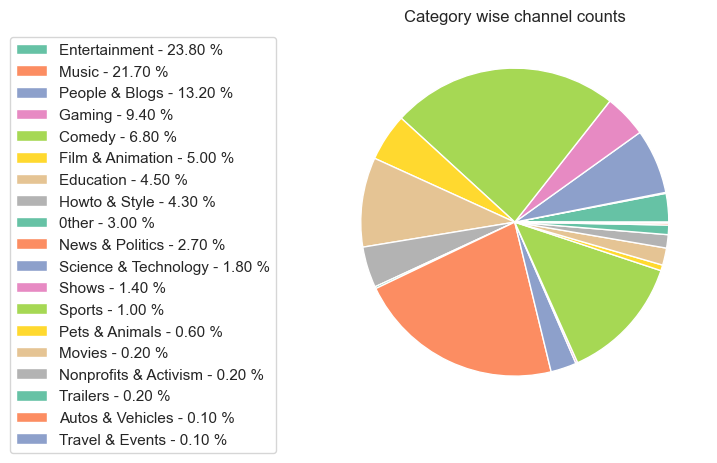

In [63]:
#원형 도형

percent = (df_pie['Youtube Channel']/df_pie['Youtube Channel'].sum())*100
sns.set()
plt.figure(figsize=(7 ,5))
sns.set_style("whitegrid")
patches , ax =  plt.pie(df_pie['Youtube Channel'] ,colors=sns.color_palette('Set2') )
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df_pie.index, percent)]

sort_legend = True
if sort_legend:
    patches, labels , dummy=  zip(*sorted(zip(patches, labels, df_pie['Youtube Channel']),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(labels , loc='upper right', bbox_to_anchor=(-0.1, 1.))
plt.title("Category wise channel counts")
plt.show()


#주어진 1000개의 채널 중에서 채널이 분배되는 방식

In [64]:
#비디오 수 순위

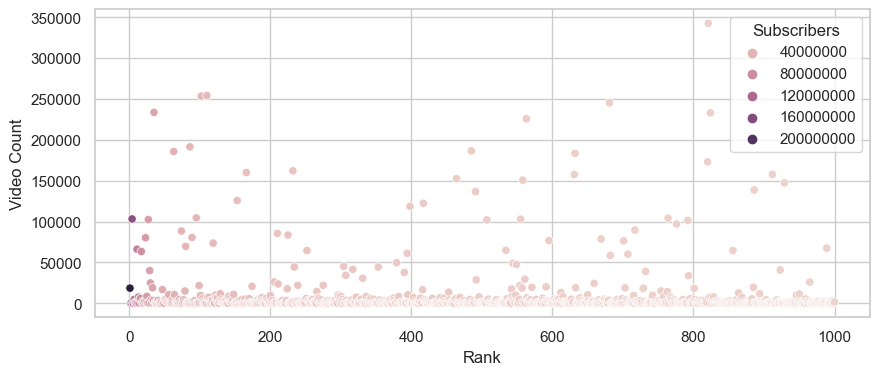

In [67]:
plt.figure(figsize=(10,4))

sns.scatterplot(x = df['Rank'] , y= df['Video Count'] , hue = df['Subscribers'], data = df  )

plt.show()

In [68]:
#비디오 구독자 수

<Axes: xlabel='Subscribers', ylabel='Video Count'>

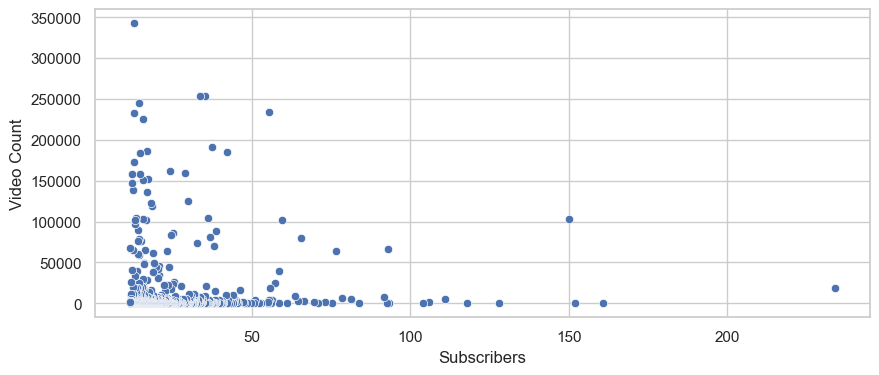

In [69]:
plt.figure(figsize=(10,4))

sns.scatterplot(y= df['Video Count'] , x = df['Subscribers']/1000000 , data = df)

In [70]:
#비디오 수 vs 구독자 수

<Axes: xlabel='Video Views', ylabel='Subscribers'>

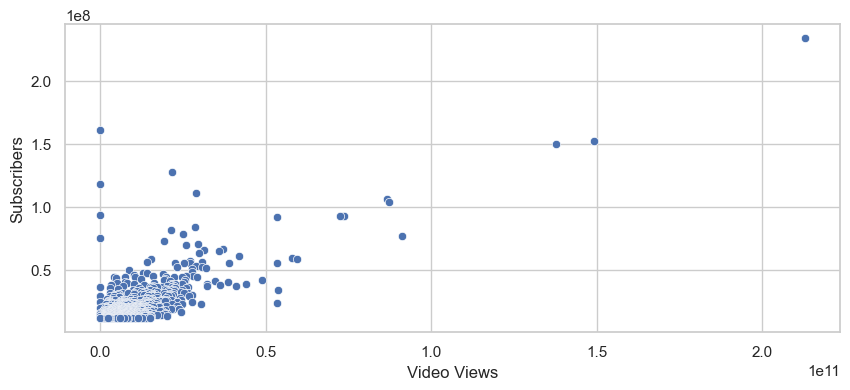

In [71]:
plt.figure(figsize=(10,4))

sns.scatterplot(x= df['Video Views'] , y = df['Subscribers'] , data = df)

#선형 관계 표시